# MSCS 634 – Lab 1: Data Visualization, Data Preprocessing, and Statistical Analysis Using Python in Jupyter Notebook

**Name:** Suresh Ghimire  
**Course:** Advanced Big Data and Data Mining (MSCS-634-M20)

**Lab Assignment:** Lab 1  
**Tools Used:** Python, Pandas, Matplotlib, Seaborn


Step 1: Data Collection

In [1]:
import pandas as pd
dataframe = pd.read_csv("retail_sales_dataset.csv")

dataframe.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


Step 2: Data Visualization

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Better visuals
sns.set(style="whitegrid")

Meaningfull Visualization

2.1. Relationship between Age and Total Amount

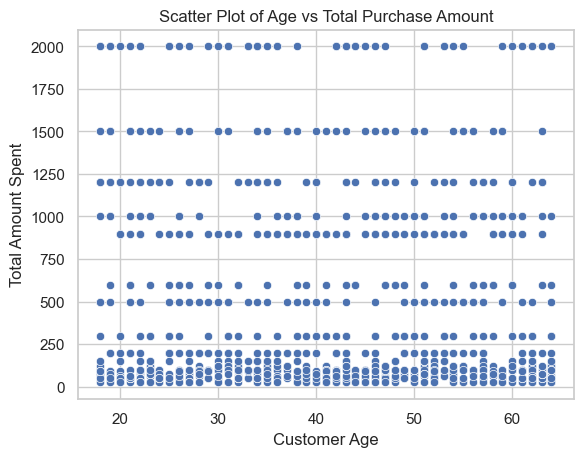

In [6]:
plt.figure()
sns.scatterplot(data=dataframe, x="Age", y="Total Amount")
plt.title("Scatter Plot of Age vs Total Purchase Amount")
plt.xlabel("Customer Age")
plt.ylabel("Total Amount Spent")
plt.show()


The scatter plot shows the relationship between customer age and total purchase amount. There is no strong linear correlation, indicating that customers across different age groups spend varying amounts. However, some higher purchase amounts appear among middle-aged customers, suggesting potential higher purchasing power in this group.

2.2. Total Sales Trend Over Time

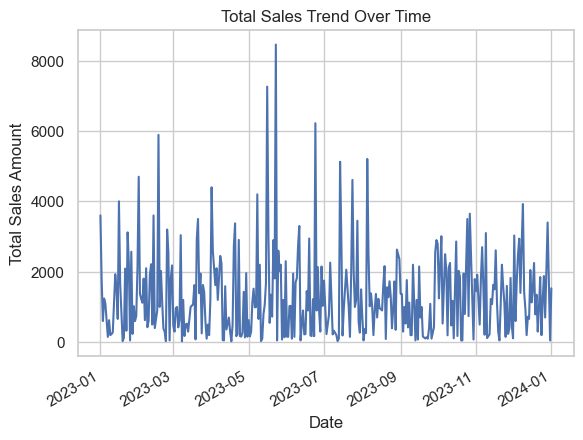

In [7]:
# Convert Date column to datetime
dataframe["Date"] = pd.to_datetime(dataframe["Date"])

# Group by date
daily_sales = dataframe.groupby("Date")["Total Amount"].sum()

plt.figure()
daily_sales.plot()
plt.title("Total Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.show()


The line plot illustrates fluctuations in total sales over time. Peaks in the graph represent days with higher sales volume, while dips indicate lower activity. This visualization helps identify seasonal trends or high-performing periods.

2.3. Sales by Product Category

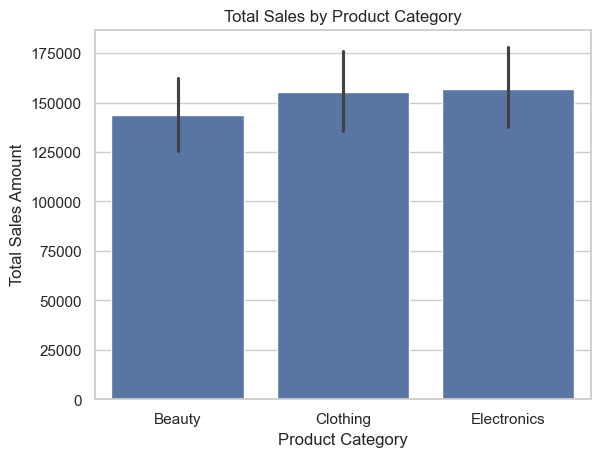

In [8]:
plt.figure()
sns.barplot(
    data=dataframe,
    x="Product Category",
    y="Total Amount",
    estimator=sum
)
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales Amount")
plt.show()


The bar chart compares total sales across different product categories. The results indicate that certain categories, such as Electronics and Clothing and Beauty contribute more significantly to total revenue compared to others, highlighting key revenue drivers.

2.4. Distribution of Customer Age

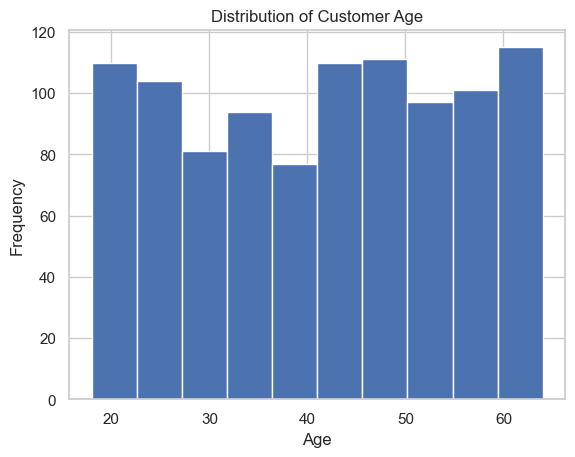

In [9]:
plt.figure()
plt.hist(dataframe["Age"], bins=10)
plt.title("Distribution of Customer Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


The histogram displays the distribution of customer ages. Most customers fall within a specific age range, indicating the primary demographic group targeted by the business.

2.5. Proportion of Sales by Product Category

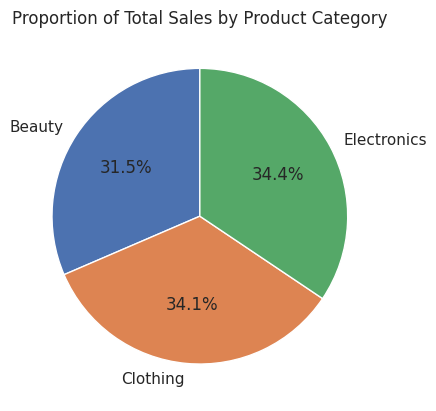

In [15]:
# Calculate total sales per product category
category_sales = dataframe.groupby("Product Category")["Total Amount"].sum()

plt.figure()
plt.pie(
    category_sales,
    labels=category_sales.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Proportion of Total Sales by Product Category")
plt.show()


Step 3: Data Processing

3.1 - Handling Missing Valuse

3.1.1 Detact and Report Missing Values

In [10]:
# Check for missing values
missing_values = dataframe.isnull().sum()
missing_values


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

3.1.2 Display dataset before handling missing values

In [11]:
dataframe.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


3.1.3 Handling missing value

In [12]:
# Fill numeric columns with mean
numeric_cols = dataframe.select_dtypes(include=["int64", "float64"]).columns
dataframe[numeric_cols] = dataframe[numeric_cols].fillna(dataframe[numeric_cols].mean())

# Fill categorical columns with mode (SAFE way)
categorical_cols = dataframe.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    dataframe[col] = dataframe[col].fillna(dataframe[col].mode()[0])


Missing values after dataset handling

In [13]:
dataframe.isnull().sum()


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

3.2 Outlier Detection and Removal

Step 3.2.1 – Display Dataset BEFORE Outlier Handling

In [21]:
dataframe.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


Step 3.2.2 – Calculate Quartiles and IQR

In [14]:
Q1 = dataframe["Total Amount"].quantile(0.25)
Q3 = dataframe["Total Amount"].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR


(np.float64(60.0), np.float64(900.0), np.float64(840.0))

The first and third quartiles (Q1 = 60, Q3 = 900) were computed for the Total Amount column, resulting in an interquartile range (IQR) of 840, indicating substantial variability in customer purchase amounts.

Step 3.2.3: IDENTIFY OUTLIERS (IQR METHOD)

In [15]:
outliers = dataframe[
    (dataframe["Total Amount"] < (Q1 - 1.5 * IQR)) |
    (dataframe["Total Amount"] > (Q3 + 1.5 * IQR))
]

outliers


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount


Outliers were identified using the Interquartile Range (IQR) method on the Total Amount column. Based on the calculated lower and upper bounds, no transactions were classified as outliers. This indicates that all purchase values fall within an acceptable range and that the dataset does not contain extreme values that could disproportionately influence analysis.

Step 3.2.4 – REMOVE OUTLIERS (IQR METHOD)

In [16]:
dataframe_no_outliers = dataframe[
    (dataframe["Total Amount"] >= (Q1 - 1.5 * IQR)) &
    (dataframe["Total Amount"] <= (Q3 + 1.5 * IQR))
]

dataframe_no_outliers.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


After identifying outliers using the IQR method, the dataset was filtered to remove any values outside the acceptable range. Since no transactions exceeded the calculated IQR bounds, the dataset remained unchanged after outlier removal. This confirms that the data is free from extreme values that could distort statistical analysis.

Step 3.3 - Data Reduction

Step 3.3.1 - Display dataset before reduction

In [17]:
dataframe_no_outliers.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


Step 3.3.2 - Apply Sampling (Reduce Dataset Size)

In [26]:
reduced_df = dataframe_no_outliers.sample(frac=0.7, random_state=42)

reduced_df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
521,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500
737,738,2023-04-25,CUST738,Male,41,Clothing,2,50,100
740,741,2023-11-30,CUST741,Male,48,Clothing,1,300,300
660,661,2023-07-16,CUST661,Female,44,Clothing,4,25,100
411,412,2023-09-16,CUST412,Female,19,Electronics,4,500,2000


Step 3.3.3 - Dimension Elimination (Drop Less Relevant Columns)

In [27]:
reduced_df = reduced_df.drop(columns=["Transaction ID", "Customer ID"])

reduced_df.head()


,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
521,2023-01-01,Male,46,Beauty,3,500,1500
737,2023-04-25,Male,41,Clothing,2,50,100
740,2023-11-30,Male,48,Clothing,1,300,300
660,2023-07-16,Female,44,Clothing,4,25,100
411,2023-09-16,Female,19,Electronics,4,500,2000


Data reduction was performed using random sampling and dimensionality reduction. A random sample of 70% of the dataset was selected to reduce the data size while preserving representativeness. Additionally, non-analytical identifier columns such as Transaction ID and Customer ID were removed to focus on meaningful attributes for analysis.

Step 3.4 - Data Scaling and discretization

Step 3.4.1 - Dispay dataset before scaling

In [32]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 521 to 150
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              700 non-null    datetime64[ns]
 1   Gender            700 non-null    object        
 2   Age               700 non-null    float64       
 3   Product Category  700 non-null    object        
 4   Quantity          700 non-null    float64       
 5   Price per Unit    700 non-null    float64       
 6   Total Amount      700 non-null    float64       
 7   Age Group         686 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(4), object(2)
memory usage: 44.6+ KB


In [28]:
reduced_df.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
521,2023-01-01,Male,46,Beauty,3,500,1500
737,2023-04-25,Male,41,Clothing,2,50,100
740,2023-11-30,Male,48,Clothing,1,300,300
660,2023-07-16,Female,44,Clothing,4,25,100
411,2023-09-16,Female,19,Electronics,4,500,2000


Step 3.4.2 - Min-Max Scaling (Numeric Columns)

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_columns = ["Age", "Quantity", "Price per Unit", "Total Amount"]

reduced_df[scaled_columns] = scaler.fit_transform(reduced_df[scaled_columns])

reduced_df.head()


,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
521,2023-01-01,Male,0.608696,Beauty,0.666667,1.000000,0.746835
737,2023-04-25,Male,0.500000,Clothing,0.333333,0.052632,0.037975
740,2023-11-30,Male,0.652174,Clothing,0.000000,0.578947,0.139241
660,2023-07-16,Female,0.565217,Clothing,1.000000,0.000000,0.037975
411,2023-09-16,Female,0.021739,Electronics,1.000000,1.000000,1.000000


Step 3.4.3 - Discretization (Create Age Groups)

In [30]:
reduced_df["Age Group"] = pd.cut(
    reduced_df["Age"],
    bins=[0, 0.33, 0.66, 1.0],
    labels=["Young", "Middle-Aged", "Senior"]
)

reduced_df[["Age", "Age Group"]].head()


,Age,Age Group
521,0.608696,Middle-Aged
737,0.500000,Middle-Aged
740,0.652174,Middle-Aged
660,0.565217,Middle-Aged
411,0.021739,Young


The Age attribute was discretized into categorical groups using Min-Max scaled values and defined bin ranges, allowing continuous numerical data to be transformed into meaningful age categories.

Step 4: Statistical Analysis

Step 4.1  General Overview of the Data

4.1.1 Dataset Structure(.info())

In [31]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 521 to 150
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              700 non-null    datetime64[ns]
 1   Gender            700 non-null    object        
 2   Age               700 non-null    float64       
 3   Product Category  700 non-null    object        
 4   Quantity          700 non-null    float64       
 5   Price per Unit    700 non-null    float64       
 6   Total Amount      700 non-null    float64       
 7   Age Group         686 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(4), object(2)
memory usage: 44.6+ KB


4.1.2 Descriptive Statistics (.describe())

In [33]:
reduced_df.describe()


,Date,Age,Quantity,Price per Unit,Total Amount
count,700,700.000000,700.000000,700.000000,700.000000
mean,2023-07-02 11:16:48,0.496863,0.504286,0.334361,0.220821
min,2023-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,2023-04-08 00:00:00,0.239130,0.000000,0.010526,0.017722
50%,2023-07-02 00:00:00,0.500000,0.666667,0.052632,0.063291
75%,2023-10-04 00:00:00,0.760870,1.000000,0.578947,0.443038
max,2024-01-01 00:00:00,1.000000,1.000000,1.000000,1.000000
std,NaN,0.298304,0.380932,0.402225,0.280089


The .info() output provides an overview of the dataset structure, including column data types and non-null values, confirming data integrity after preprocessing. The .describe() function summarizes key statistical properties of numerical attributes, offering insight into central tendency and data spread.

Step 4.2 - Central Tendency Measures

In [34]:
central_tendency = reduced_df[["Age", "Quantity", "Price per Unit", "Total Amount"]].agg(
    ["min", "max", "mean", "median", "std"]
)

mode_values = reduced_df[["Age", "Quantity", "Price per Unit", "Total Amount"]].mode()

central_tendency, mode_values


(             Age  Quantity  Price per Unit  Total Amount
 min     0.000000  0.000000        0.000000      0.000000
 max     1.000000  1.000000        1.000000      1.000000
 mean    0.496863  0.504286        0.334361      0.220821
 median  0.500000  0.666667        0.052632      0.063291
 std     0.298304  0.380932        0.402225      0.280089,
         Age  Quantity  Price per Unit  Total Amount
 0  0.543478       1.0             0.0      0.012658)

Central tendency measures including minimum, maximum, mean, median, and mode were calculated for the scaled numerical variables. Since Min–Max scaling was applied, all values fall within the range of 0 to 1. The results provide a clear summary of typical customer purchase behavior and confirm the consistency of the normalized dataset.

Step 4.3 - Dispersion Measures

Step 4.3.1 – Display Dispersion Measures

In [35]:
# Select numeric columns
numeric_cols = ["Age", "Quantity", "Price per Unit", "Total Amount"]

# Calculate dispersion metrics
dispersion = reduced_df[numeric_cols].agg(
    ["min", "max", "var", "std"]
)

dispersion


,Age,Quantity,Price per Unit,Total Amount
min,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000
var,0.088985,0.145110,0.161785,0.078450
std,0.298304,0.380932,0.402225,0.280089


Step 4.3.2 - Quartiles and Interquartile Range (IQR)

In [36]:
Q1 = reduced_df[numeric_cols].quantile(0.25)
Q3 = reduced_df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR


(Age               0.239130
 Quantity          0.000000
 Price per Unit    0.010526
 Total Amount      0.017722
 Name: 0.25, dtype: float64,
 Age               0.760870
 Quantity          1.000000
 Price per Unit    0.578947
 Total Amount      0.443038
 Name: 0.75, dtype: float64,
 Age               0.521739
 Quantity          1.000000
 Price per Unit    0.568421
 Total Amount      0.425316
 dtype: float64)

Quartiles and interquartile range (IQR) were computed for the numerical attributes to assess data dispersion. The IQR values indicate the spread of the middle 50% of observations and confirm that the scaled dataset maintains meaningful variability across features such as age, quantity, price per unit, and total purchase amount.

Step 4.4 - Correlation Analysis

In [37]:
reduced_df


,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age Group
521,2023-01-01,Male,0.608696,Beauty,0.666667,1.000000,0.746835,Middle-Aged
737,2023-04-25,Male,0.500000,Clothing,0.333333,0.052632,0.037975,Middle-Aged
740,2023-11-30,Male,0.652174,Clothing,0.000000,0.578947,0.139241,Middle-Aged
660,2023-07-16,Female,0.565217,Clothing,1.000000,0.000000,0.037975,Middle-Aged
411,2023-09-16,Female,0.021739,Electronics,1.000000,1.000000,1.000000,Young
...,...,...,...,...,...,...,...,...
262,2023-08-28,Male,0.108696,Beauty,0.333333,0.010526,0.017722,Young
610,2023-02-24,Male,0.717391,Beauty,0.666667,1.000000,0.746835,Senior
297,2023-04-20,Male,0.195652,Beauty,1.000000,0.578947,0.594937,Young
414,2023-01-27,Male,0.760870,Clothing,0.333333,0.010526,0.017722,Senior


Step 4.4.1 - Compute Correlation Matrix

In [38]:
# Compute correlation matrix for numeric columns
correlation_matrix = reduced_df.corr(numeric_only=True)

correlation_matrix


,Age,Quantity,Price per Unit,Total Amount
Age,1.000000,-0.061051,-0.053935,-0.080990
Quantity,-0.061051,1.000000,-0.003649,0.365077
Price per Unit,-0.053935,-0.003649,1.000000,0.845397
Total Amount,-0.080990,0.365077,0.845397,1.000000


A correlation matrix was computed to analyze relationships among numerical variables. The results indicate a strong positive correlation between price per unit and total purchase amount, suggesting that higher-priced items contribute significantly to overall sales. Quantity also shows a moderate positive correlation with total amount, while customer age exhibits little to no correlation with spending behavior.